In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from konlpy.tag import Mecab
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
%matplotlib inline

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
submission = pd.read_csv('../input/sample_submission.csv')

In [3]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [4]:
test.tail()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
45,2021-04-05,월,2973,125,174,704,331.0,모닝롤/커피콩빵 우유/주스 계란후라이 누룽지탕/흑미밥 청양콩나물국 스팸구이 양상추샐...,쌀밥/흑미밥/찰현미밥 쇠고기미역국 춘천닭갈비 오지치즈후라이 가지두반장볶음 포기김치 ...,흑미밥 돈육고추장찌개 갈치구이 김치전 취나물무침 깍두기
46,2021-04-06,화,2973,76,170,636,364.0,모닝롤/모닝샌드 우유/주스 계란후라이 고구마스프/흑미밥 아욱국 참치채소볶음 양상추샐...,쌀밥/귀리밥/찰현미밥 순두부백탕 매콤소갈비찜 깻잎완자전 돌나물초장무침 포기김치 시리...,추가밥 짬뽕*생면 수제찹쌀꿔바로우 메추리알곤약장조림 단무지무침 포기김치
47,2021-04-07,수,2973,96,214,1,334.0,모닝롤/호떡맥모닝 우유/주스 계란후라이 팥죽/흑미밥 닭살해장국 우엉채조림 양상추샐러...,쌀밥/흑미밥/찰현미밥 냉이국 돈육간장불고기 비빔냉면 오이나물볶음 겉절이김치 양상추샐...,단호박카레라이스 시금치된장국 소떡소떡 파프리카해초무침 감귤쥬스 포기김치
48,2021-04-08,목,2973,105,238,509,324.0,모닝롤/크로크무슈 우유/주스 계란후라이 누룽지탕/흑미밥 감자국 두부양념조림 양상추샐...,쌀밥/옥수수밥/찰현미밥 맑은떡국 (New)로제찜닭 가자미구이*장 유채나물무침 포기김...,흑미밥 어묵매운탕 쇠고기숙주볶음 채소계란찜 쑥갓생무침 김치볶음
49,2021-04-09,금,2973,259,268,0,229.0,모닝롤/토마토샌드 우유/주스 계란후라이 채소죽/흑미밥 대구지리 애호박나물볶음 양상추...,쌀밥/흑미밥/찰현미밥 사골우거지국 해물누룽지탕 청포묵*양념간장 비름나물고추장무침 석...,흑미밥 맑은버섯국 매운사태조림 춘권*타르타르D 열무나물무침 포기김치


In [5]:
submission.head()

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0


In [6]:
train_target = train[['중식계', '석식계']]

In [7]:
train_target

,중식계,석식계
0,1039.0,331.0
1,867.0,560.0
2,1017.0,573.0
3,978.0,525.0
4,925.0,330.0
...,...,...
1200,1093.0,421.0
1201,832.0,353.0
1202,579.0,217.0
1203,1145.0,502.0


In [8]:
train.shape, test.shape, submission.shape

((1205, 12), (50, 10), (50, 3))

### 외부 데이터

In [9]:
body_temp = pd.read_csv('../input/체감온도.csv', header = 2, encoding = 'cp949')
body_temp.columns = ['일자', '기온', '풍속', '체감온도']

temp = pd.read_csv('../input/ta_20210625090530.csv', header = 7, encoding = 'cp949')
temp.columns = ['일자', '지점', '평균기온', '최저기온', '최고기온']

rainfall = pd.read_csv('../input/rn_20210625091238.csv', header = 6, encoding = 'cp949')
rainfall.fillna(0, inplace = True)
rainfall.columns = ['일자', '지점', '강수량']

In [10]:
train = pd.merge(train, body_temp)
train = pd.merge(train, temp)
train = pd.merge(train, rainfall)

test = pd.merge(test, temp)
test = pd.merge(test, rainfall)
test = pd.merge(test, body_temp)

In [11]:
train.shape, test.shape

((1205, 20), (50, 18))

## Make Feature

### 1. 다음날이 공휴일인가?

In [12]:
train['일자'] = pd.to_datetime(train['일자'])
test['일자'] = pd.to_datetime(test['일자'])

In [13]:
train['year'] = train['일자'].dt.year
test['year'] = test['일자'].dt.year

In [14]:
train['month'] = train['일자'].dt.month
test['month'] = test['일자'].dt.month

In [15]:
train['week'] = train['일자'].dt.week
test['week'] = test['일자'].dt.week

In [16]:
train['day'] = train['일자'].dt.day
test['day'] = test['일자'].dt.day

In [17]:
train['weekly_num'] = train['day'].apply(lambda x : 1 if (x>=1) and (x<=7)
                                                  else 2 if (x>7) and (x<=14)
                                                  else 3 if (x>14) and (x<=21)
                                                  else 4 if (x>21) and (x<=28) else 5)

test['weekly_num'] = test['day'].apply(lambda x : 1 if (x>=1) and (x<=7)
                                                  else 2 if (x>7) and (x<=14)
                                                  else 3 if (x>14) and (x<=21)
                                                  else 4 if (x>21) and (x<=28) else 5)    

In [18]:
train['요일'] = train['일자'].dt.weekday
test['요일'] = test['일자'].dt.weekday

In [19]:
train['month_group'] = pd.cut(train['day'], bins = [1, 10, 20, 31], 
                              right = False, labels = ['Cho', 'Jung', 'Mal'])

test['month_group'] = pd.cut(test['day'], bins = [1, 10, 20, 31], 
                              right = False, labels = ['Cho', 'Jung', 'Mal'])

In [20]:
train = pd.concat([train, pd.get_dummies(train['month_group'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['month_group'])], axis=1)

In [21]:
train['season'] = train['month'].apply(lambda x : 'spring' if x in [3, 4, 5]
                                                  else 'summer' if x in [6, 7, 8]
                                                  else 'fall' if x in [9, 10, 11]
                                                  else 'winter')

test['season'] = test['month'].apply(lambda x : 'spring' if x in [3, 4, 5]
                                                  else 'summer' if x in [6, 7, 8]
                                                  else 'fall' if x in [9, 10, 11]
                                                  else 'winter')

In [22]:
train = pd.concat([train, pd.get_dummies(train['season'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['season'])], axis=1)

In [23]:
train['공휴일전후'] = 0
test['공휴일전후'] = 0

In [24]:
train['공휴일전후'][17] = 1
train['공휴일전후'][3] = 1
train['공휴일전후'][62] = 1
# train['공휴일전후'][67] = 1
# train['공휴일전후'][82] = 1
train['공휴일전후'][131] = 1
# train['공휴일전후'][130] = 1
train['공휴일전후'][152] = 1
train['공휴일전후'][226] = 1
train['공휴일전후'][221] = 1
train['공휴일전후'][224] = 1
# train['공휴일전후'][244] = 1
train['공휴일전후'][245] = 1
# train['공휴일전후'][267] = 1
train['공휴일전후'][310] = 2
train['공휴일전후'][311] = 1
train['공휴일전후'][309] = 1
train['공휴일전후'][330] = 1
train['공휴일전후'][379] = 1
train['공휴일전후'][467] = 1
# train['공휴일전후'][469] = 1
train['공휴일전후'][470] = 1
train['공휴일전후'][502] = 2
# train['공휴일전후'][501] = 1
# train['공휴일전후'][511] = 1
train['공휴일전후'][565] = 1
train['공휴일전후'][623] = 1
train['공휴일전후'][651] = 1
# train['공휴일전후'][650] = 1
train['공휴일전후'][705] = 1
# train['공휴일전후'][707] = 1
train['공휴일전후'][709] = 1
# train['공휴일전후'][733] = 1
# train['공휴일전후'][748] = 1
# train['공휴일전후'][792] = 1
train['공휴일전후'][815] = 1
train['공휴일전후'][864] = 1
# train['공휴일전후'][863] = 1
train['공휴일전후'][950] = 1
train['공휴일전후'][951] = 1
train['공휴일전후'][953] = 1
train['공휴일전후'][954] = 1
train['공휴일전후'][955] = 1
train['공휴일전후'][971] = 2
# train['공휴일전후'][970] = 1
# train['공휴일전후'][1037] = 1
train['공휴일전후'][1038] = 1
train['공휴일전후'][1099] = 1
train['공휴일전후'][1129] = 1
# train['공휴일전후'][1128] = 1
train['공휴일전후'][1187] = 1
# train['공휴일전후'][1186] = 1

test['공휴일전후'][10] = 2
test['공휴일전후'][20] = 1

In [25]:
train = pd.get_dummies(train, columns=['공휴일전후'])
test = pd.get_dummies(test, columns=['공휴일전후'])

In [26]:
test['공휴일전후_0'][20] = 1
test['공휴일전후_1'][20] = 0

***

In [27]:
train['corona'] = [1 if x > 0 else 0 for x in train['현본사소속재택근무자수']]
test['corona'] = [1 if x > 0 else 0 for x in test['현본사소속재택근무자수']]

In [28]:
from korean_lunar_calendar import KoreanLunarCalendar

In [29]:
calender = KoreanLunarCalendar()

In [30]:
def get_lunar_date(data) :
    lunar_date_list = []
    for i in range(data.shape[0]) :
        calender.setSolarDate(data.year[i], data.month[i], data.day[i])
        lunar_date = calender.LunarIsoFormat()
        lunar_date_list.append(lunar_date)
    return lunar_date_list

In [31]:
train['lunar_date'] = get_lunar_date(train)
test['lunar_date'] = get_lunar_date(test)

In [32]:
def get_lunar_date2(data) :
    l_d = []
    for i in range(data.shape[0]) :
        try :
            row = data.iloc[i,:]
            lunar_d = pd.to_datetime(row.lunar_date)
            l_d.append(lunar_d)
        except :
            l_d.append(pd.to_datetime('2017-02-28'))
    return l_d

In [33]:
train['lunar_date'] = get_lunar_date2(train)
test['lunar_date'] = get_lunar_date2(test)

***

In [34]:
train['shift_1day'] = train.일자.shift(-1)
test['shift_1day'] = test.일자.shift(-1)

하루 뒤 날짜 붙임

In [35]:
train.at[1204, 'shift_1day'] = datetime(2021,1,27)
test.at[49, 'shift_1day'] = datetime(2021,4,10)

결측치 처리되는 부분 노가다로 채움

In [36]:
train['day_gap'] = (train.shift_1day - train.일자).astype(str)
test['day_gap'] = (test.shift_1day - test.일자).astype(str)

1일 뒤 날짜랑 날짜 간격 생성

In [37]:
train.at[0, 'day_gap'] = '-1 days'
test.at[0, 'day_gap'] = '-1 days'

각 데이터별 맨 앞행은 1일로 채움

In [38]:
train['야근요일'] = train.요일.apply(lambda x : 1 if (x == 1) or (x == 3) else 0)
test['야근요일'] = test.요일.apply(lambda x : 1 if (x == 1) or (x == 3) else 0)

수, 금요일만 1로 생성

In [39]:
import re

In [40]:
def get_holiday_score(x) :
    
    s = int(re.sub(r'[^0-9]', '', x))
    if s == 1 :
        return 0
    else :
        return 1

뒤의 날짜랑 1일 차이면 평일로 인식하고 그 외에는 연휴 혹은 주말로 간주

In [41]:
train['day_gap'] = train.day_gap.apply(get_holiday_score)
test['day_gap'] = test.day_gap.apply(get_holiday_score)

In [42]:
test.at[49, 'day_gap'] = 1

4월 10일이 토요일이라 4월10, 11일 2일이므로 주말 혹은 연휴에 해당 -> 1

In [43]:
train['출근'] = train['본사정원수'] - (train['본사휴가자수'] + train['본사출장자수'] + train['현본사소속재택근무자수'])
train['휴가비율'] = train['본사휴가자수'] / train['본사정원수']
train['출장비율'] = train['본사출장자수'] / train['본사정원수']
train['야근비율'] = train['본사시간외근무명령서승인건수'] / train['출근']
train['재택비율'] = train['현본사소속재택근무자수'] / train['본사정원수']
train['회사출근비율'] = train['출근'] / train['본사정원수']

In [44]:
test['출근'] = test['본사정원수'] - (test['본사휴가자수'] + test['본사출장자수'] + test['현본사소속재택근무자수'])
test['휴가비율'] = test['본사휴가자수'] / test['본사정원수']
test['출장비율'] = test['본사출장자수'] / test['본사정원수']
test['야근비율'] = test['본사시간외근무명령서승인건수'] / test['출근']
test['재택비율'] = test['현본사소속재택근무자수'] / test['본사정원수']
test['회사출근비율'] = test['출근'] / test['본사정원수']

In [45]:
train['출근_cumsum'] = train['출근'].cumsum()
train['출근_평균'] = train['출근_cumsum'] / (train.index+1)

test['출근_cumsum'] = test['출근'].cumsum()
test['출근_평균'] = test['출근_cumsum'] / (test.index+1)

In [46]:
train['월급날'] = 0
test['월급날'] = 0

In [47]:
train['월급날'][train.day==21] = 1
test['월급날'][test.day==21] = 1

In [48]:
train['계절_month_group'] = train['season'].astype(str) + '_' + train['month_group'].astype(str)
test['계절_month_group'] = test['season'].astype(str) + '_' + test['month_group'].astype(str)

In [49]:
train = pd.concat([train, pd.get_dummies(train['계절_month_group'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['계절_month_group'])], axis=1)

### 코로나 확진자 수(진주)

In [50]:
train['확진자수'] = 0
train['확진자수'][train.일자=='2020-02-21']=2
train['확진자수'][train.일자=='2020-03-27']=1
train['확진자수'][train.일자=='2020-03-31']=5
train['확진자수'][train.일자=='2020-04-03']=1
train['확진자수'][train.일자=='2020-04-08']=1
train['확진자수'][train.일자=='2020-05-21']=1
train['확진자수'][train.일자=='2020-05-22']=1
train['확진자수'][train.일자=='2020-08-03']=1
train['확진자수'][train.일자=='2020-08-21']=1
train['확진자수'][train.일자=='2020-09-04']=1
train['확진자수'][train.일자=='2020-09-07']=1
train['확진자수'][train.일자=='2020-10-19']=1
train['확진자수'][train.일자=='2020-11-10']=1
train['확진자수'][train.일자=='2020-11-17']=1
train['확진자수'][train.일자=='2020-11-18']=2
train['확진자수'][train.일자=='2020-11-19']=1
train['확진자수'][train.일자=='2020-11-20']=2
train['확진자수'][train.일자=='2020-11-24']=2
train['확진자수'][train.일자=='2020-11-25']=33
train['확진자수'][train.일자=='2020-11-26']=27
train['확진자수'][train.일자=='2020-11-27']=3
train['확진자수'][train.일자=='2020-11-30']=3
train['확진자수'][train.일자=='2020-12-01']=1
train['확진자수'][train.일자=='2020-12-02']=1
train['확진자수'][train.일자=='2020-12-04']=1
train['확진자수'][train.일자=='2020-12-07']=6
train['확진자수'][train.일자=='2020-12-08']=11
train['확진자수'][train.일자=='2020-12-09']=4
train['확진자수'][train.일자=='2020-12-10']=2
train['확진자수'][train.일자=='2020-12-11']=10
train['확진자수'][train.일자=='2020-12-14']=7
train['확진자수'][train.일자=='2020-12-16']=1
train['확진자수'][train.일자=='2020-12-17']=3
train['확진자수'][train.일자=='2020-12-18']=9
train['확진자수'][train.일자=='2020-12-21']=4
train['확진자수'][train.일자=='2020-12-22']=2
train['확진자수'][train.일자=='2020-12-23']=4
train['확진자수'][train.일자=='2020-12-24']=10
train['확진자수'][train.일자=='2020-12-28']=6
train['확진자수'][train.일자=='2020-12-29']=15
train['확진자수'][train.일자=='2020-12-30']=12
train['확진자수'][train.일자=='2020-12-31']=25
train['확진자수'][train.일자=='2021-01-04']=19
train['확진자수'][train.일자=='2021-01-05']=11
train['확진자수'][train.일자=='2021-01-06']=8
train['확진자수'][train.일자=='2021-01-07']=11
train['확진자수'][train.일자=='2021-01-08']=10
train['확진자수'][train.일자=='2021-01-11']=30
train['확진자수'][train.일자=='2021-01-12']=20
train['확진자수'][train.일자=='2021-01-13']=1
train['확진자수'][train.일자=='2021-01-14']=5
train['확진자수'][train.일자=='2021-01-15']=6
train['확진자수'][train.일자=='2021-01-18']=4
train['확진자수'][train.일자=='2021-01-20']=1
train['확진자수'][train.일자=='2021-01-21']=1
train['확진자수'][train.일자=='2021-01-22']=14
train['확진자수'][train.일자=='2021-01-25']=4
train['확진자수'][train.일자=='2021-01-26']=7

In [51]:
test['확진자수'] = 0
test['확진자수'][test.일자=='2021-01-27']=5
test['확진자수'][test.일자=='2021-01-29']=5
test['확진자수'][test.일자=='2021-02-01']=1
test['확진자수'][test.일자=='2021-02-05']=1
test['확진자수'][test.일자=='2021-02-09']=3
test['확진자수'][test.일자=='2021-02-12']=1
test['확진자수'][test.일자=='2021-02-16']=1
test['확진자수'][test.일자=='2021-02-17']=2
test['확진자수'][test.일자=='2021-02-19']=3
test['확진자수'][test.일자=='2021-02-22']=1
test['확진자수'][test.일자=='2021-03-02']=1
test['확진자수'][test.일자=='2021-03-03']=1
test['확진자수'][test.일자=='2021-03-09']=2
test['확진자수'][test.일자=='2021-03-10']=6
test['확진자수'][test.일자=='2021-03-11']=50
test['확진자수'][test.일자=='2021-03-12']=95
test['확진자수'][test.일자=='2021-03-15']=57
test['확진자수'][test.일자=='2021-03-16']=18
test['확진자수'][test.일자=='2021-03-17']=16
test['확진자수'][test.일자=='2021-03-18']=23
test['확진자수'][test.일자=='2021-03-19']=27
test['확진자수'][test.일자=='2021-03-22']=37
test['확진자수'][test.일자=='2021-03-23']=22
test['확진자수'][test.일자=='2021-03-24']=19
test['확진자수'][test.일자=='2021-03-25']=19
test['확진자수'][test.일자=='2021-03-26']=14
test['확진자수'][test.일자=='2021-03-29']=11
test['확진자수'][test.일자=='2021-03-30']=7
test['확진자수'][test.일자=='2021-03-31']=8
test['확진자수'][test.일자=='2021-04-01']=4
test['확진자수'][test.일자=='2021-04-02']=15
test['확진자수'][test.일자=='2021-04-05']=4
test['확진자수'][test.일자=='2021-04-06']=3
test['확진자수'][test.일자=='2021-04-08']=2
test['확진자수'][test.일자=='2021-04-09']=10

***

### 메뉴 군집화 후 원-핫 인코딩

In [52]:
train['조식메뉴토큰'] = train['조식메뉴'].str.split(' ')
train['중식메뉴토큰'] = train['중식메뉴'].str.split(' ')
train['석식메뉴토큰'] = train['석식메뉴'].str.split(' ')

test['조식메뉴토큰'] = test['조식메뉴'].str.split(' ')
test['중식메뉴토큰'] = test['중식메뉴'].str.split(' ')
test['석식메뉴토큰'] = test['석식메뉴'].str.split(' ')

In [53]:
def get_menu_comp_cnt(data) :
    menu_cnt = []
    for token in data :
        comp_cnt = 0
        for text in token :
            if (len(text) > 1) & (text.startswith("(") != 1) :
                comp_cnt += 1
            else :
                pass
        menu_cnt.append(comp_cnt)
    return menu_cnt

In [54]:
train['조식메뉴수'] = get_menu_comp_cnt(train['조식메뉴토큰'])
train['중식메뉴수'] = get_menu_comp_cnt(train['중식메뉴토큰'])
train['석식메뉴수'] = get_menu_comp_cnt(train['석식메뉴토큰'])

test['조식메뉴수'] = get_menu_comp_cnt(test['조식메뉴토큰'])
test['중식메뉴수'] = get_menu_comp_cnt(test['중식메뉴토큰'])
test['석식메뉴수'] = get_menu_comp_cnt(test['석식메뉴토큰'])

### mean_encoding

In [55]:
a = train.groupby(['season', '요일'])['중식계'].agg([('mean_lunch', 'mean')])
train = train.merge(a, on=['season', '요일'], how='left')
test = test.merge(a, on=['season', '요일'], how='left')

In [56]:
a = train.groupby(['season', 'month', '요일'])['석식계'].agg([('mean_dinner', 'mean')])
train = train.merge(a, on=['season', 'month', '요일'], how='left')
test = test.merge(a, on=['season', 'month', '요일'], how='left')

### 모델링 데이터 생성

In [57]:
train.shape, test.shape

((1205, 73), (50, 63))

In [58]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '기온', '풍속', '체감온도',
       '지점', '평균기온', '최저기온', '최고기온', '강수량', 'year', 'month', 'week', 'day',
       'weekly_num', 'month_group', 'Cho', 'Jung', 'Mal', 'season', 'fall',
       'spring', 'summer', 'winter', '공휴일전후_0', '공휴일전후_1', '공휴일전후_2', 'corona',
       'lunar_date', 'shift_1day', 'day_gap', '야근요일', '출근', '휴가비율', '출장비율',
       '야근비율', '재택비율', '회사출근비율', '출근_cumsum', '출근_평균', '월급날', '계절_month_group',
       'fall_Cho', 'fall_Jung', 'fall_Mal', 'spring_Cho', 'spring_Jung',
       'spring_Mal', 'summer_Cho', 'summer_Jung', 'summer_Mal', 'winter_Cho',
       'winter_Jung', 'winter_Mal', '확진자수', '조식메뉴토큰', '중식메뉴토큰', '석식메뉴토큰',
       '조식메뉴수', '중식메뉴수', '석식메뉴수', 'mean_lunch', 'mean_dinner'],
      dtype='object')

In [59]:
test.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '지점', '평균기온', '최저기온', '최고기온',
       '강수량', '기온', '풍속', '체감온도', 'year', 'month', 'week', 'day', 'weekly_num',
       'month_group', 'Cho', 'Jung', 'Mal', 'season', 'spring', 'winter',
       '공휴일전후_0', '공휴일전후_1', '공휴일전후_2', 'corona', 'lunar_date', 'shift_1day',
       'day_gap', '야근요일', '출근', '휴가비율', '출장비율', '야근비율', '재택비율', '회사출근비율',
       '출근_cumsum', '출근_평균', '월급날', '계절_month_group', 'spring_Cho',
       'spring_Jung', 'spring_Mal', 'winter_Cho', 'winter_Jung', 'winter_Mal',
       '확진자수', '조식메뉴토큰', '중식메뉴토큰', '석식메뉴토큰', '조식메뉴수', '중식메뉴수', '석식메뉴수',
       'mean_lunch', 'mean_dinner'],
      dtype='object')

In [60]:
X1 = train[['본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수',\
            '출근_cumsum', '출근_평균', \
            '공휴일전후_0', '중식메뉴수', \
            'month', 'day', 'day_gap', '요일', 'week', 'Cho', 'Jung', 'Mal',\
            '출근', '재택비율',\
            'spring_Cho', 'spring_Jung', 'spring_Mal', 'winter_Cho', 'winter_Jung', 'winter_Mal',
           ]]
target1 = test[X1.columns]

y1 = train_target.중식계

In [61]:
X1.shape, target1.shape, y1.shape

((1205, 24), (50, 24), (1205,))

In [62]:
X2 = train[['본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수',\
            '출근_cumsum', '출근_평균', \
            '공휴일전후_0', '석식메뉴수', \
            'month', 'day', 'day_gap', '요일', 'week', 'Cho', 'Jung', 'Mal',\
            '출근', '재택비율',\
            'spring_Cho', 'spring_Jung', 'spring_Mal', 'winter_Cho', 'winter_Jung', 'winter_Mal',
           ]]
target2 = test[X2.columns]

y2 = train_target.석식계
X2 = X2.fillna(0)

In [63]:
X2.shape, target2.shape, y2.shape

((1205, 24), (50, 24), (1205,))

In [64]:
ftr = X1.values
target = y1

In [65]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(ftr, target, test_size=0.3, random_state=0)
train_x.shape, valid_x.shape

((843, 24), (362, 24))

In [66]:
from lightgbm import LGBMRegressor

clf = LGBMRegressor(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        subsample=0.8,
        max_depth=12,
        silent=-1,
        verbose=-1
        )

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric = 'RMSE', 
        verbose=100, early_stopping_rounds= 50)

Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 81.389	training's l2: 6624.17	valid_1's rmse: 94.267	valid_1's l2: 8886.26
[200]	training's rmse: 58.2333	training's l2: 3391.11	valid_1's rmse: 84.5238	valid_1's l2: 7144.27
[300]	training's rmse: 48.338	training's l2: 2336.56	valid_1's rmse: 82.2322	valid_1's l2: 6762.13
[400]	training's rmse: 41.4864	training's l2: 1721.12	valid_1's rmse: 81.8529	valid_1's l2: 6699.9
Early stopping, best iteration is:
[385]	training's rmse: 42.365	training's l2: 1794.8	valid_1's rmse: 81.806	valid_1's l2: 6692.22


LGBMRegressor(learning_rate=0.02, max_depth=12, n_estimators=1000,
              num_leaves=32, silent=-1, subsample=0.8, verbose=-1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

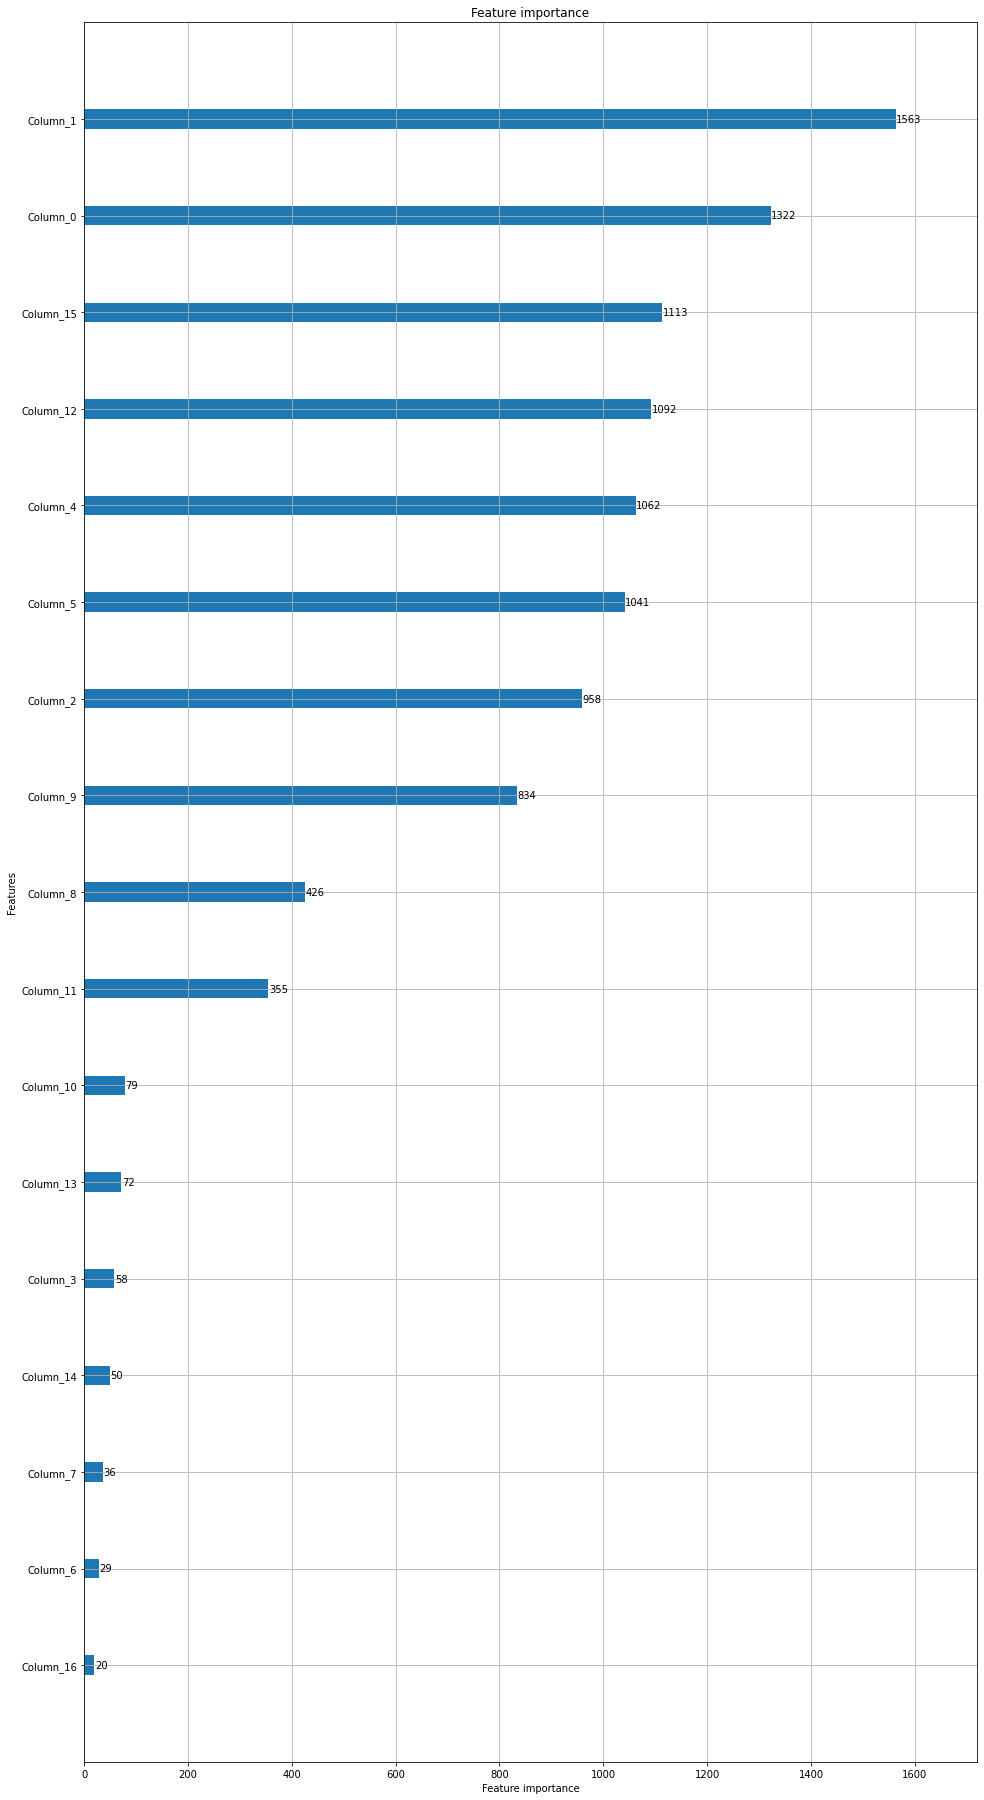

In [171]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32), max_num_features=100)

In [172]:
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(clf, threshold=100)
smf.fit(ftr, target)
X_new = smf.transform(ftr)
X_te_new = smf.transform(target1.values)
feature_idx = smf.get_support()
#feature_name = ftr.columns[feature_idx]

In [173]:
#ftr.columns[feature_idx]

In [174]:
#X_new = pd.DataFrame(X_new)
#X_te_new = pd.DataFrame(X_te_new)

#X_new.columns = feature_name
#X_te_new.columns = feature_name

In [67]:
ftr = X1.values
target = y1

In [68]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, ftr, target, scoring='neg_mean_absolute_error', cv=5)
print('교차 검증별 MAE:', np.round(scores, 4))
print('평균 검증 MAE:', np.round(np.mean(scores), 4))

교차 검증별 MAE: [-75.489  -68.6354 -70.4489 -77.1629 -94.2224]
평균 검증 MAE: -77.1917


In [69]:
ftr = X2.values
target = y2

In [70]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, ftr, target, scoring='neg_mean_absolute_error', cv=5)
print('교차 검증별 MAE:', np.round(scores, 4))
print('평균 검증 MAE:', np.round(np.mean(scores), 4))

교차 검증별 MAE: [-53.8891 -47.4159 -51.1663 -45.9031 -67.3625]
평균 검증 MAE: -53.1474


***

In [73]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from ngboost import NGBRegressor
from catboost import CatBoostRegressor, Pool

LGBM만 사용하면 PB : 71

In [100]:
kf = KFold(n_splits = 5, random_state = 607, shuffle = True)

In [101]:
cb = CatBoostRegressor(iterations = 20000, learning_rate = 0.01, eval_metric = 'MAE', silent = True, 
                       loss_function = 'MAE')

In [102]:
cb_pred_1 = np.zeros((target1.shape[0]))
mae_list = []
for tr_idx, val_idx in kf.split(X1):
    tr_x, val_x = X1.iloc[tr_idx], X1.iloc[val_idx]
    tr_y, val_y = y1.iloc[tr_idx], y1.iloc[val_idx]
    train_data = Pool(data = tr_x, label = tr_y)
    val_data = Pool(data = val_x, label = val_y)
    cb.fit(train_data, eval_set = val_data, early_stopping_rounds = 2000, use_best_model = True, verbose = 5000)
    best = cb.best_iteration_
    pred = cb.predict(val_x, ntree_end = best)
    mae = mean_absolute_error(val_y, pred)
    mae_list.append(mae)
    print(f'FOLD MAE = {mae}')
    sub_pred = cb.predict(target1, ntree_end = best) / 5
    cb_pred_1 += sub_pred
print(f'\n{cb.__class__.__name__} MAE = {np.mean(mae_list)}')

0:	learn: 167.3145841	test: 163.2276754	best: 163.2276754 (0)	total: 1.76ms	remaining: 35.3s
Stopped by overfitting detector  (2000 iterations wait)

bestTest = 63.30943958
bestIteration = 2584

Shrink model to first 2585 iterations.
FOLD MAE = 63.31795422629684
0:	learn: 166.8186712	test: 165.0921567	best: 165.0921567 (0)	total: 1.46ms	remaining: 29.2s
5000:	learn: 27.1916382	test: 61.7714144	best: 61.6920338 (4104)	total: 6.76s	remaining: 20.3s
Stopped by overfitting detector  (2000 iterations wait)

bestTest = 61.69203385
bestIteration = 4104

Shrink model to first 4105 iterations.
FOLD MAE = 61.694820668920656
0:	learn: 163.8371774	test: 176.8563061	best: 176.8563061 (0)	total: 1.78ms	remaining: 35.6s
5000:	learn: 26.3514279	test: 62.1108477	best: 62.1057346 (4994)	total: 6.75s	remaining: 20.3s
10000:	learn: 20.1643672	test: 61.7466808	best: 61.7284764 (9805)	total: 13.5s	remaining: 13.5s
Stopped by overfitting detector  (2000 iterations wait)

bestTest = 61.64958744
bestIteration 

In [103]:
cb_pred_1

array([ 985.7243282 ,  932.48241668,  737.80813446, 1243.57943083,
       1051.01977695, 1025.39242378,  982.71806401,  773.40237665,
       1255.77143323, 1072.92542147,  833.23145878, 1230.56630993,
       1057.4776845 , 1018.07305535,  920.85801119,  757.76041102,
       1240.69789985, 1051.10607606,  962.70752077,  903.2225392 ,
        698.59620109, 1101.23878128, 1013.54261521,  977.69132471,
        757.51714265, 1270.19085476, 1091.01591407, 1013.94739598,
        953.51785891,  757.8316104 , 1235.05229588, 1022.43537466,
       1008.8390568 ,  922.91427583,  713.6560179 , 1191.31470728,
       1001.35991384,  948.47344787,  864.6927996 ,  691.15618436,
       1193.07707831, 1016.43974644,  969.79429647,  877.74371203,
        693.56221634, 1208.78520433, 1036.72928098,  970.29779654,
        899.06159904,  694.12650252])

In [104]:
cb_pred_2 = np.zeros((target2.shape[0]))
mae_list = []
for tr_idx, val_idx in kf.split(X2):
    tr_x, val_x = X2.iloc[tr_idx], X2.iloc[val_idx]
    tr_y, val_y = y2.iloc[tr_idx], y2.iloc[val_idx]
    train_data = Pool(data = tr_x, label = tr_y)
    val_data = Pool(data = val_x, label = val_y)
    cb.fit(train_data, eval_set = val_data, early_stopping_rounds = 2000, use_best_model = True, verbose = 5000)
    best = cb.best_iteration_
    pred = cb.predict(val_x, ntree_end = best)
    mae = mean_absolute_error(val_y, pred)
    mae_list.append(mae)
    print(f'FOLD MAE = {mae}')
    sub_pred = cb.predict(target2, ntree_end = best) / 5
    cb_pred_2 += sub_pred
print(f'\n{cb.__class__.__name__} MAE = {np.mean(mae_list)}')

0:	learn: 97.2719700	test: 100.0865135	best: 100.0865135 (0)	total: 5.27ms	remaining: 1m 45s
5000:	learn: 16.2793116	test: 48.0397175	best: 48.0068779 (4545)	total: 9.18s	remaining: 27.5s
Stopped by overfitting detector  (2000 iterations wait)

bestTest = 47.95160383
bestIteration = 7411

Shrink model to first 7412 iterations.
FOLD MAE = 47.95312653693426
0:	learn: 98.5268455	test: 94.9362646	best: 94.9362646 (0)	total: 2.39ms	remaining: 47.8s
5000:	learn: 16.2784980	test: 42.9027540	best: 42.8739162 (4726)	total: 8.71s	remaining: 26.1s
Stopped by overfitting detector  (2000 iterations wait)

bestTest = 42.80937881
bestIteration = 5303

Shrink model to first 5304 iterations.
FOLD MAE = 42.810375519615505
0:	learn: 98.0974575	test: 96.7693766	best: 96.7693766 (0)	total: 2.29ms	remaining: 45.8s
5000:	learn: 15.7963944	test: 46.2292781	best: 46.1953976 (3935)	total: 8.61s	remaining: 25.8s
Stopped by overfitting detector  (2000 iterations wait)

bestTest = 46.13009007
bestIteration = 5321


In [105]:
cb_pred_2

array([375.57243302, 467.99899768, 373.97605168, 592.01345434,
       537.11447645, 490.83503627, 509.52034258, 463.99676945,
       640.82265655, 582.69988682, 255.15782329, 668.79949388,
       623.7654097 , 479.40669392, 542.79710598, 469.25233695,
       691.9790154 , 651.18157942, 463.29246504, 542.73755806,
       418.71233352, 653.70535085, 453.98549429, 579.34625969,
       467.78920753, 682.59642429, 663.00064085, 472.71586428,
       560.08109323, 425.18822851, 673.34686259, 587.34463702,
       473.93466713, 514.52736267, 409.98064313, 659.39006323,
       611.81159029, 455.85337046, 504.49207882, 397.38862154,
       648.14126165, 616.89380531, 449.94069681, 484.71283365,
       416.75676081, 631.75131826, 594.94786113, 464.40253701,
       525.89386683, 416.68788758])

In [106]:
ngb = NGBRegressor(n_estimators = 15000, verbose = 0, random_state = 607)

In [107]:
ngb_pred_1 = np.zeros((target1.shape[0]))
mae_list = []
for tr_idx, val_idx in kf.split(X1):
    tr_x, val_x = X1.iloc[tr_idx], X1.iloc[val_idx]
    tr_y, val_y = y1.iloc[tr_idx], y1.iloc[val_idx]
    ngb.fit(tr_x, tr_y, val_x, val_y, early_stopping_rounds = 2000)
    pred = ngb.predict(val_x)
    mae = mean_absolute_error(val_y, pred)
    mae_list.append(mae)
    print(f'FOLD MAE = {mae}')
    sub_pred = ngb.predict(target1) / 5
    ngb_pred_1 += sub_pred
print(f'\n{ngb.__class__.__name__} MAE = {np.mean(mae_list)}')

FOLD MAE = 64.83916587962203
FOLD MAE = 41.902305683492756
FOLD MAE = 33.126896721330745
FOLD MAE = 29.01755357361949
FOLD MAE = 29.627800362692685

NGBRegressor MAE = 39.70274444415154


In [108]:
ngb_pred_1

array([ 957.2478253 ,  962.09064738,  809.12814112, 1300.44114852,
       1048.38056547, 1056.66685515, 1028.70086615,  801.89531107,
       1323.10804421, 1064.85942978,  826.94710265, 1320.71657435,
       1095.13294516, 1098.28032459,  966.60741579,  799.83162876,
       1243.66222911, 1049.17410358,  968.90756211,  954.04129575,
        740.00320029, 1103.69292866, 1053.1743441 ,  993.2081366 ,
        757.88350955, 1305.69111952, 1168.54611605, 1042.90174123,
        929.57517926,  731.17425468, 1256.20498246,  974.04414497,
       1055.21831286,  936.46017314,  757.27865613, 1224.89392902,
        985.99872761,  959.59715957,  932.74457088,  714.03652259,
       1235.89631591, 1014.26667089, 1002.59902624,  859.9058674 ,
        693.71054082, 1227.87601572, 1035.50426777, 1009.76402192,
        873.2312924 ,  679.31269032])

In [109]:
ngb_pred_2 = np.zeros((target2.shape[0]))
mae_list = []
for tr_idx, val_idx in kf.split(X2):
    tr_x, val_x = X2.iloc[tr_idx], X2.iloc[val_idx]
    tr_y, val_y = y2.iloc[tr_idx], y2.iloc[val_idx]
    ngb.fit(tr_x, tr_y, val_x, val_y, early_stopping_rounds = 2000)
    pred = ngb.predict(val_x)
    mae = mean_absolute_error(val_y, pred)
    mae_list.append(mae)
    print(f'FOLD MAE = {mae}')
    sub_pred = ngb.predict(target2) / 5
    ngb_pred_2 += sub_pred
print(f'\n{ngb.__class__.__name__} MAE = {np.mean(mae_list)}')

FOLD MAE = 52.054293210638654
FOLD MAE = 30.891517378972846
FOLD MAE = 31.734919936451064
FOLD MAE = 20.911466853591204
FOLD MAE = 24.204977367789535

NGBRegressor MAE = 31.959434949488656


In [110]:
ngb_pred_2

array([348.60302547, 408.68306891, 478.9061463 , 558.33352069,
       475.3675033 , 547.08225598, 520.20938196, 598.26064409,
       668.09283205, 526.3976538 , 299.30089394, 686.9318112 ,
       636.462867  , 479.23771312, 594.06821431, 493.45150484,
       683.70939776, 593.92750355, 464.11008999, 620.24288641,
       488.53441495, 707.99410546, 531.01699943, 615.73193717,
       567.35746319, 763.62016895, 706.49427902, 503.44543301,
       565.52929822, 482.31530334, 717.29296907, 537.00922929,
       515.31985344, 568.04273555, 473.96131981, 684.78578439,
       582.90061668, 468.65970541, 625.84884759, 523.61185935,
       678.61966372, 602.04896585, 503.17176745, 571.51076771,
       474.94468198, 641.9240059 , 573.45650041, 537.89408528,
       535.36192082, 429.23979306])

In [111]:
lgbm = LGBMRegressor(random_state = 607, max_depth = 8, n_estimators = 20000, learning_rate = .01)

In [112]:
X1 = X1.values
X2 = X2.values

In [113]:
lgbm_pred_1 = np.zeros((target1.shape[0]))
mae_list = []
for tr_idx, val_idx in kf.split(X1):
    tr_x, val_x = X1[tr_idx], X1[val_idx]
    tr_y, val_y = y1[tr_idx], y1[val_idx]
    lgbm.fit(tr_x, tr_y, eval_set = [(tr_x, tr_y), (val_x, val_y)], eval_metric = 'mean_absolute_error', early_stopping_rounds = 2000, verbose = 2000)
    pred = lgbm.predict(val_x)
    mae = mean_absolute_error(val_y, pred)
    mae_list.append(mae)
    print(f'FOLD MAE = {mae}')
    sub_pred = lgbm.predict(target1) / 5
    lgbm_pred_1 += sub_pred
print(f'\n{lgbm.__class__.__name__} MAE = {np.mean(mae_list)}')

Training until validation scores don't improve for 2000 rounds
[2000]	training's l1: 23.6684	training's l2: 996.902	valid_1's l1: 70.0513	valid_1's l2: 8979.54
Early stopping, best iteration is:
[675]	training's l1: 39.1762	training's l2: 2693.33	valid_1's l1: 68.5181	valid_1's l2: 8710.06
FOLD MAE = 68.51809044280695
Training until validation scores don't improve for 2000 rounds
[2000]	training's l1: 24.458	training's l2: 1053.9	valid_1's l1: 65.5298	valid_1's l2: 7201.69
Early stopping, best iteration is:
[1083]	training's l1: 33.2074	training's l2: 1969.65	valid_1's l1: 65.1417	valid_1's l2: 7238.1
FOLD MAE = 65.14165932326182
Training until validation scores don't improve for 2000 rounds
[2000]	training's l1: 21.7667	training's l2: 846.847	valid_1's l1: 68.8125	valid_1's l2: 8447.5
Early stopping, best iteration is:
[544]	training's l1: 40.552	training's l2: 2885.12	valid_1's l1: 67.6077	valid_1's l2: 7987.21
FOLD MAE = 67.60767733446757
Training until validation scores don't impro

In [114]:
lgbm_pred_1

array([1015.70226919,  959.3174576 ,  696.17873209, 1323.58051846,
       1084.73360449, 1055.97112212, 1010.18785383,  771.41380229,
       1345.97423058, 1109.8855383 ,  804.33916484, 1317.32592527,
       1119.88638291, 1092.68028839,  955.41470315,  757.8833575 ,
       1287.68821269, 1112.65243551,  981.64690604,  931.67098696,
        725.21243069, 1176.69573198, 1070.18946857, 1018.42139044,
        772.38315169, 1296.27726839, 1104.28466037, 1063.20744178,
        993.03501835,  802.55404259, 1296.77588236, 1067.71203102,
       1067.49640957,  963.00120619,  744.22756655, 1242.44785973,
       1034.49305266,  932.93126114,  899.966709  ,  713.65811048,
       1241.21898148, 1062.46390808,  978.74663938,  874.55099027,
        722.98725531, 1236.40144981, 1072.63615759, 1004.25853617,
        944.05880948,  730.86551349])

In [115]:
lgbm_pred_2 = np.zeros((target1.shape[0]))
mae_list = []
for tr_idx, val_idx in kf.split(X2):
    tr_x, val_x = X2[tr_idx], X2[val_idx]
    tr_y, val_y = y2[tr_idx], y2[val_idx]
    
    lgbm.fit(tr_x, tr_y, eval_set = [(tr_x, tr_y), (val_x, val_y)], eval_metric = 'mean_absolute_error', early_stopping_rounds = 2000, verbose = 2000)
    pred = lgbm.predict(val_x)
    mae = mean_absolute_error(val_y, pred)
    print(f'FOLD MAE = {mae}')
    mae_list.append(mae)
    sub_pred = lgbm.predict(target2) / 5
    lgbm_pred_2 += sub_pred
print(f'\n{lgbm.__class__.__name__} MAE = {np.mean(mae_list)}')

Training until validation scores don't improve for 2000 rounds
[2000]	training's l1: 14.4571	training's l2: 365.615	valid_1's l1: 50.534	valid_1's l2: 5819.43
Early stopping, best iteration is:
[1253]	training's l1: 19.3358	training's l2: 664.314	valid_1's l1: 50.0432	valid_1's l2: 5735.14
FOLD MAE = 50.043194264186596
Training until validation scores don't improve for 2000 rounds
[2000]	training's l1: 15.8022	training's l2: 506.741	valid_1's l1: 44.2932	valid_1's l2: 4128.73
Early stopping, best iteration is:
[350]	training's l1: 32.2197	training's l2: 2100.63	valid_1's l1: 43.5991	valid_1's l2: 3776.71
FOLD MAE = 43.59912189514938
Training until validation scores don't improve for 2000 rounds
[2000]	training's l1: 17.2405	training's l2: 622.715	valid_1's l1: 48.3564	valid_1's l2: 3953.09
Early stopping, best iteration is:
[429]	training's l1: 28.0638	training's l2: 1715.63	valid_1's l1: 47.9184	valid_1's l2: 3815.48
FOLD MAE = 47.91837344474284
Training until validation scores don't 

In [116]:
lgbm_pred_2

array([418.83988038, 542.10628593, 431.06049637, 648.38219578,
       594.17043028, 506.81253793, 585.63036925, 505.19382045,
       682.66430802, 628.16717785, 264.40014382, 717.50619151,
       691.340373  , 494.05522353, 631.43071576, 530.09738735,
       713.0389922 , 698.82116107, 492.13737658, 600.19776681,
       427.80089792, 701.10450383, 455.92782512, 667.6497193 ,
       516.98923253, 693.96286844, 688.62975711, 484.9635461 ,
       629.62607504, 432.11800258, 712.48930463, 662.28750984,
       504.20657064, 585.6951424 , 420.13724941, 692.82251085,
       678.44098971, 487.12906884, 552.50786777, 409.37245328,
       692.84159452, 683.7235484 , 484.29608943, 545.966222  ,
       422.77036877, 674.64485507, 656.44111308, 506.81006039,
       583.48117444, 417.59112   ])

In [154]:
submission['중식계'] = (ngb_pred_1 + lgbm_pred_1 + cb_pred_1) / 3
submission['석식계'] = (ngb_pred_2 + lgbm_pred_2 + cb_pred_2) / 3

In [155]:
ngb_pred_1.sum(), ngb_pred_2.sum()

(49930.2144345379, 27859.02339016184)

In [156]:
lgbm_pred_1.sum(), lgbm_pred_2.sum()

(50587.29242678267, 28448.480075310894)

In [157]:
cb_pred_1.sum(), cb_pred_2.sum()

(48831.12597899365, 26338.23920944027)

In [158]:
import datetime
subtime = datetime.datetime.now().strftime('%Y-%m-%d %H-%M-%S')

In [159]:
submission.head()

,일자,중식계,석식계
0,2021-01-27,986.224808,381.005113
1,2021-01-28,951.296841,472.929451
2,2021-01-29,747.705003,427.980898
3,2021-02-01,1289.200366,599.576390
4,2021-02-02,1061.377982,535.550803


In [163]:
# 49482.43247838575
submission.중식계.sum()

49782.877613438075

In [164]:
# 24917.377231011906 
submission.석식계.sum()

25048.580891637674

In [162]:
#submission['석식계'] = submission['석식계'] - 50

In [165]:
submission.to_csv(f'{subtime}.csv', index = False)